In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("adult.data")
df1=df.copy()

In [3]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1.understanding the data.

In [4]:
df1

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df2=df1.copy()

In [6]:
df2

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df2.shape

(32560, 15)

In [8]:
df2.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [9]:
print(df2.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [10]:
df2.rename(columns = {' <=50K':'salary'}, inplace = True)

In [11]:
df2

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df2["salary"].value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [13]:
df2[" State-gov"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  State-gov, dtype: int64

In [14]:
df2.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
#finding unique values
for column in df2.columns:
    print(df2[column].value_counts())
    print("*"*20)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: 39, Length: 73, dtype: int64
********************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  State-gov, dtype: int64
********************
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name:  77516, Length: 21647, dtype: int64
********************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th   

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 2.cleaning the data

In [17]:
df2.isnull().sum() #checking missing values

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
salary            0
dtype: int64

In [18]:
df2

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# analysis of outliars and removing them

# 1.visualization of data-finding outliars-removing outliars

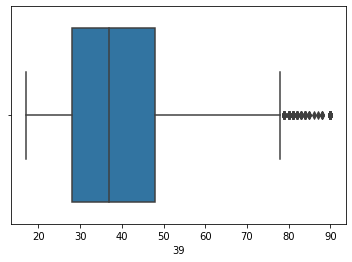

In [19]:
# Box Plot visualization
import seaborn as sns
sns.boxplot(df2['39'])

we can see that the value above 80 in column named 39 is outliar.

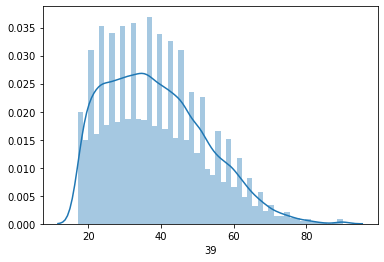

In [20]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2['39'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [21]:
#finding outliars
print(np.where(df2['39']>80))

(array([  221,   917,  1039,  1167,  1934,  2302,  2890,  2905,  3210,
        3536,  3962,  4069,  4108,  4833,  5103,  5271,  5369,  5405,
        6213,  6231,  6623,  6747,  7480,  7719,  7871,  8380,  8430,
        8805,  8962,  8972,  9470, 10209, 10544, 11237, 11511, 11730,
       11995, 12450, 12491, 12829, 12974, 13024, 13294, 13695, 13927,
       14158, 14710, 14755, 15355, 15661, 15891, 16301, 16761, 18276,
       18412, 18724, 18831, 19044, 19171, 19179, 19211, 19488, 19494,
       19746, 20420, 20462, 20609, 20825, 21500, 21811, 21834, 22219,
       22480, 22894, 22897, 23458, 24026, 24042, 24237, 24279, 24394,
       24559, 25302, 26011, 26730, 27794, 28462, 28947, 29593, 29723,
       31029, 31431, 31695, 31854, 32276, 32366, 32458, 32493, 32524]),)


In [22]:
#keeping only those values less than 80 i.e removing the outliar
df2 = df2[df2["39"]<80]

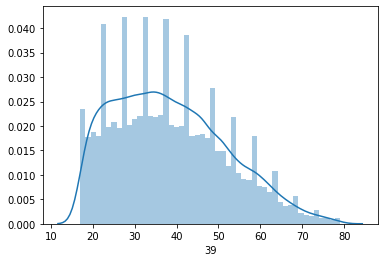

In [23]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2['39'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

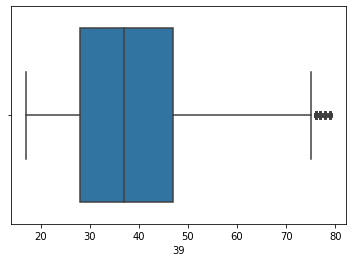

In [24]:
sns.boxplot(df2['39'])

see the values above 80 is removed from the data

In [25]:
df2.shape# see the reducing values of rows

(32439, 15)

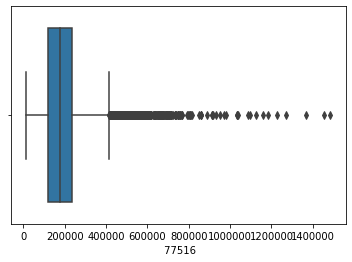

In [26]:
# Box Plot visualization
sns.boxplot(df2[' 77516'])

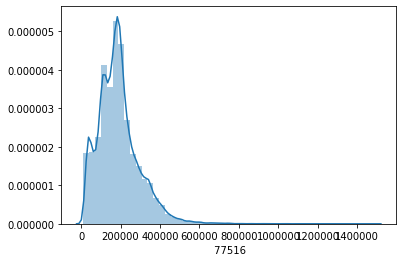

In [27]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2[' 77516'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [28]:
#finding outliars
print(np.where(df2[' 77516']>500000))

(array([   36,    39,   181,   191,   214,   228,   310,   412,   505,
         648,   824,   911,   959,  1008,  1146,  1285,  1308,  1448,
        1591,  1841,  1877,  1964,  2011,  2058,  2334,  2339,  2361,
        2391,  2667,  2751,  2761,  2815,  2841,  2867,  2890,  2925,
        2966,  3182,  3291,  3397,  3465,  3490,  3556,  3558,  3599,
        3706,  3725,  3731,  3734,  3784,  3856,  3892,  3949,  3968,
        4045,  4107,  4261,  4556,  4680,  4712,  4955,  5177,  5258,
        5329,  5348,  5400,  5482,  5507,  5530,  5599,  5704,  5991,
        5995,  6121,  6144,  6194,  6233,  6262,  6496,  6622,  6675,
        6705,  6755,  6824,  6851,  7005,  7093,  7129,  7304,  7323,
        7427,  7475,  7634,  7690,  7903,  8005,  8206,  8227,  8245,
        8256,  8314,  8400,  8452,  8456,  8472,  8522,  8625,  8695,
        8886,  8961,  8981,  9009,  9211,  9285,  9318,  9578,  9662,
        9677,  9698,  9710,  9716,  9718,  9762,  9772,  9969, 10360,
       10402, 10486

In [29]:
#keeping only those values less than 500000i.e removing the outliar
df2 = df2[df2[" 77516"]<500000]

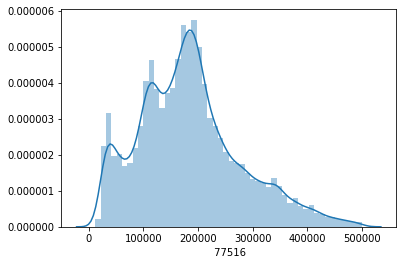

In [30]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2[' 77516'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [31]:
df2.shape

(32068, 15)

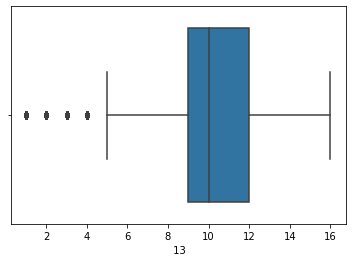

In [32]:
# Box Plot visualization
sns.boxplot(df2[' 13'])

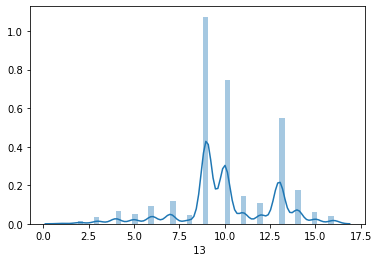

In [33]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2[' 13'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [34]:
#finding outliars
print(np.where(df2[' 13']<4))

(array([   53,   157,   190,   215,   217,   308,   326,   372,   406,
         452,   475,   486,   499,   524,   626,   758,   860,   906,
         913,   916,  1120,  1273,  1285,  1331,  1520,  1608,  1609,
        1764,  1886,  2093,  2128,  2182,  2410,  2466,  2545,  2548,
        2580,  2603,  2631,  2635,  2744,  2775,  2777,  2819,  2841,
        2899,  2997,  3070,  3147,  3182,  3236,  3296,  3353,  3372,
        3394,  3535,  3610,  3617,  3814,  3865,  3875,  4036,  4057,
        4229,  4252,  4450,  4506,  4642,  4753,  4916,  4932,  4940,
        4986,  5011,  5102,  5233,  5256,  5280,  5352,  5420,  5437,
        5449,  5530,  5543,  5572,  5623,  5640,  5647,  5740,  5748,
        5783,  5864,  5877,  5881,  5912,  6035,  6330,  6381,  6515,
        6752,  6956,  7009,  7057,  7184,  7203,  7320,  7394,  7583,
        7606,  7615,  7644,  7726,  7769,  7942,  7953,  7961,  7969,
        8084,  8144,  8152,  8179,  8331,  8361,  8611,  8633,  8741,
        8743,  8744

In [35]:
#keeping only those values more than 4 i.e removing the outliar
df2 = df2[df2[" 13"]>4]

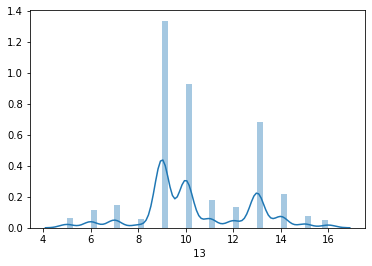

In [36]:
# plotting density plot for carat using distplot()
sns.distplot(a=df2[' 13'], hist=True)
 
# visualizing plot using matplotlib.pyplot library
plt.show()

In [37]:
df2.shape

(30911, 15)

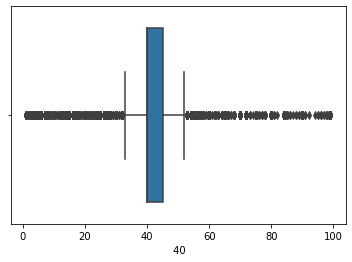

In [38]:
# Box Plot visualization
sns.boxplot(df2[' 40'])

In [39]:
print(np.where(df2[' 40']<30))

(array([    0,     5,    19, ..., 30895, 30903, 30909]),)


In [40]:
#keeping only those values more than 30 i.e removing the outliar
df2 = df2[df2[" 40"]>30]

In [41]:
df2.shape

(26003, 15)

In [42]:
print(np.where(df2[' 40']>50))

(array([    7,    15,    21, ..., 25980, 25984, 25992]),)


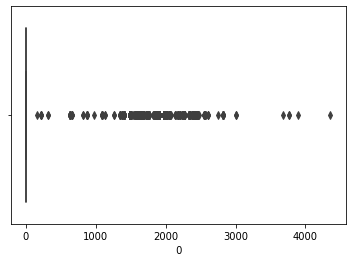

In [43]:
# Box Plot visualization
sns.boxplot(df2[' 0'])

the column 2174 and 0 are highly fragmented so we need to drop it,which we have
done at later stage

In [44]:
df2.shape

(26003, 15)

In [45]:
sns.set()

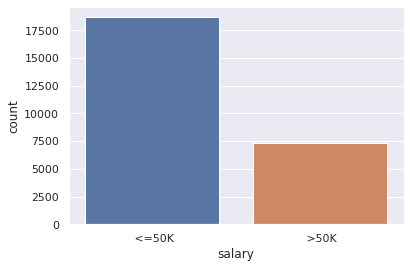

In [46]:
# making a count plot for "salary" column which is our target variable
sns.countplot('salary',data=df2)

In [47]:
df2["salary"].value_counts()

 <=50K    18668
 >50K      7335
Name: salary, dtype: int64

# Encoding the categorical values

In [48]:
print(df2.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', 'salary'],
      dtype='object')


In [49]:
df2.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,salary
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [50]:
df2_numeric = df2[["39"," 77516"," 13"," 2174"," 0"," 40",]]

In [51]:
df2_numeric.head()

,39,77516,13,2174,0,40
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
6,52,209642,9,0,0,45


In [52]:
df2_categorical = df2[[' State-gov', ' Bachelors', ' Never-married', ' Not-in-family', ' White',' Male',' United-States',"salary"]]

In [53]:
df2_categorical.head()

,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States,salary
1,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Wife,White,Female,United-States,<=50K
6,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,>50K


In [54]:
df2_categorical_encoded = pd.get_dummies(df2_categorical, drop_first=True)
df2_categorical_encoded.head(20)

,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,State-gov_ State-gov,State-gov_ Without-pay,Bachelors_ 11th,Bachelors_ 12th,...,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,salary_ >50K
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
df2_new = pd.concat([df2_numeric, df2_categorical_encoded], axis=1)
df2_new.head()

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,...,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,salary_ >50K
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


# re-shaping the data

In [56]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26003 entries, 1 to 32559
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   39                                          26003 non-null  int64
 1    77516                                      26003 non-null  int64
 2    13                                         26003 non-null  int64
 3    2174                                       26003 non-null  int64
 4    0                                          26003 non-null  int64
 5    40                                         26003 non-null  int64
 6    State-gov_ Federal-gov                     26003 non-null  uint8
 7    State-gov_ Local-gov                       26003 non-null  uint8
 8    State-gov_ Never-worked                    26003 non-null  uint8
 9    State-gov_ Private                         26003 non-null  uint8
 10   State-gov_ Self-emp-inc          

In [57]:
df3=df2_new.drop(columns=[' 2174',' 0'],axis=1)#becoz these two columns has very high variation

In [58]:
df3

,39,77516,13,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,...,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,salary_ >50K
1,38,215646,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,52,209642,9,45,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,310152,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32555,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
#filling nan values with median

In [60]:
df3['39'].fillna(int(df3['39'].median()), inplace=True)
df3[' 77516'].fillna(int(df3[' 77516'].median()), inplace=True)
df3[' 13'].fillna(int(df3[' 13'].median()), inplace=True)
df3[' 40'].fillna(int(df3[' 40'].median()), inplace=True)
df3

,39,77516,13,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,...,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,salary_ >50K
1,38,215646,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,52,209642,9,45,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,310152,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32555,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df3

,39,77516,13,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Never-worked,State-gov_ Private,State-gov_ Self-emp-inc,State-gov_ Self-emp-not-inc,...,United-States_ Puerto-Rico,United-States_ Scotland,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ Trinadad&Tobago,United-States_ United-States,United-States_ Vietnam,United-States_ Yugoslavia,salary_ >50K
1,38,215646,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,52,209642,9,45,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,310152,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32555,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
df3.shape

(26003, 81)

In [63]:
print(df3.columns)

Index(['39', ' 77516', ' 13', ' 40', ' State-gov_ Federal-gov',
       ' State-gov_ Local-gov', ' State-gov_ Never-worked',
       ' State-gov_ Private', ' State-gov_ Self-emp-inc',
       ' State-gov_ Self-emp-not-inc', ' State-gov_ State-gov',
       ' State-gov_ Without-pay', ' Bachelors_ 11th', ' Bachelors_ 12th',
       ' Bachelors_ 9th', ' Bachelors_ Assoc-acdm', ' Bachelors_ Assoc-voc',
       ' Bachelors_ Bachelors', ' Bachelors_ Doctorate', ' Bachelors_ HS-grad',
       ' Bachelors_ Masters', ' Bachelors_ Prof-school',
       ' Bachelors_ Some-college', ' Never-married_ Married-AF-spouse',
       ' Never-married_ Married-civ-spouse',
       ' Never-married_ Married-spouse-absent',
       ' Never-married_ Never-married', ' Never-married_ Separated',
       ' Never-married_ Widowed', ' Not-in-family_ Not-in-family',
       ' Not-in-family_ Other-relative', ' Not-in-family_ Own-child',
       ' Not-in-family_ Unmarried', ' Not-in-family_ Wife',
       ' White_ Asian-Pac-Islander'

In [64]:
df3["salary_ >50K"].value_counts()

0    18668
1     7335
Name: salary_ >50K, dtype: int64

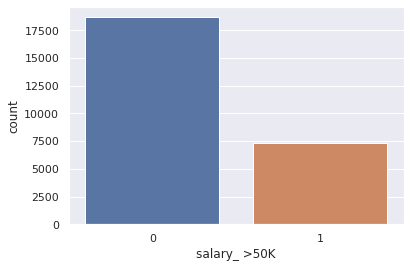

In [65]:
# making a count plot for "salary" column which is our target variable
sns.countplot('salary_ >50K',data=df3)

In [66]:
type("salary_ >50K")

str

In [67]:
df3.rename(columns = {'salary_ >50K':'salary'}, inplace = True)

In [68]:
df3["salary"].value_counts()

0    18668
1     7335
Name: salary, dtype: int64

# balancing our target variable by upsampling


In [69]:
from sklearn.utils import resample


In [70]:
# Separate majority and minority classes
df3_majority = df3[df3.salary==0]
df3_minority = df3[df3.salary==1]
 
# Upsample minority class
df3_minority_upsampled = resample(df3_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18668,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df4=df3_upsampled = pd.concat([df3_majority, df3_minority_upsampled])
 
# Display new class counts
df4.salary.value_counts()

1    18668
0    18668
Name: salary, dtype: int64

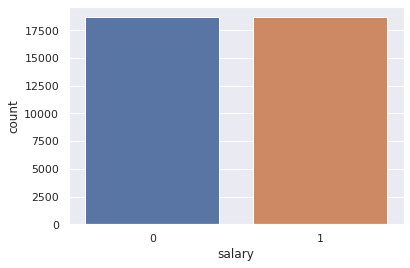

In [71]:
# making a count plot for balanced "salary" column which is our target variable
sns.countplot('salary',data=df4)

In [72]:
df4.shape

(37336, 81)

# Seperating data and features

In [73]:
X=df4.drop(columns=['salary'],axis=1)
Y=df4['salary']

In [74]:
print(Y)

1        0
2        0
3        0
4        0
12       0
        ..
16115    1
28945    1
15036    1
11895    1
4358     1
Name: salary, Length: 37336, dtype: uint8


# Spiliting the data into training data & test data

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(37336, 80) (29868, 80) (7468, 80)


In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# model training

# 1.logistic regression

In [78]:
#model=LogisticRegression(class_weight={0:2,1:8})
model=LogisticRegression()

In [79]:
#training the logistic regression model with training data
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#train data f1 score

In [81]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_train)
print("f1 Score",f1_score(Y_train,y_pred))
print("accuracy_score",accuracy_score(Y_train,y_pred))
print(confusion_matrix(Y_train,y_pred))
print(classification_report(Y_train,y_pred))

f1 Score 0.7986596642716758
accuracy_score 0.7907794294897549
[[11225  3734]
 [ 2515 12394]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     14959
           1       0.77      0.83      0.80     14909

    accuracy                           0.79     29868
   macro avg       0.79      0.79      0.79     29868
weighted avg       0.79      0.79      0.79     29868



In [82]:
#test data f1 score

In [83]:
y_pred = model.predict(X_test)
print("f1 Score",f1_score(Y_test,y_pred))
print("accuracy_score",accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

f1 Score 0.7965323814380418
accuracy_score 0.7862881628280665
[[2748  961]
 [ 635 3124]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      3709
           1       0.76      0.83      0.80      3759

    accuracy                           0.79      7468
   macro avg       0.79      0.79      0.79      7468
weighted avg       0.79      0.79      0.79      7468



In [84]:
t = np.arange(start=0,stop=1,step=0.01)
for i in t:
    pred = model.predict_proba(X_test)
    pred = (pred[:,1]>=i).astype("int")
    score = print("f1 Score",f1_score(Y_test,pred),i)

f1 Score 0.6696356996526232 0.0
f1 Score 0.6779722172108966 0.01
f1 Score 0.6915285451197053 0.02
f1 Score 0.7020499859590003 0.03
f1 Score 0.7116552771450265 0.04
f1 Score 0.7201000673530261 0.05
f1 Score 0.7261754112722671 0.06
f1 Score 0.7332677165354331 0.07
f1 Score 0.7391520206533612 0.08
f1 Score 0.7442652509265753 0.09
f1 Score 0.7494443321883208 0.1
f1 Score 0.7547169811320754 0.11
f1 Score 0.7586065152605076 0.12
f1 Score 0.7626749611197512 0.13
f1 Score 0.7661442006269593 0.14
f1 Score 0.7709320695102685 0.15
f1 Score 0.7737009544008484 0.16
f1 Score 0.7785148726728013 0.17
f1 Score 0.7817849068791043 0.18
f1 Score 0.784407146724418 0.19
f1 Score 0.7873638344226579 0.2
f1 Score 0.7894909688013136 0.21
f1 Score 0.7908101571946795 0.22
f1 Score 0.7933318613380438 0.23
f1 Score 0.7942382271468144 0.24
f1 Score 0.7952370353883821 0.25
f1 Score 0.7973607694028181 0.26
f1 Score 0.7985627666741523 0.27
f1 Score 0.7993231810490694 0.28
f1 Score 0.8001811389109023 0.29
f1 Score 0.800

# 2. GradientBoostingClassifier

In [85]:
model1=GradientBoostingClassifier()

In [86]:
model1.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Precision is defined as the accuracy of judgment.
Recall is the ability to identify the number of samples that would really count positive for a specific attribute.
An F1-score means a statistical measure of the accuracy of a test or an individual. It is composed of two primary attributes, viz. precision and recall, both calculated as percentages and combined as harmonic mean to assign a single number, easy for comprehension.

In [87]:
#train data f1 score

In [88]:
y_pred = model1.predict(X_train)
print("f1 Score",f1_score(Y_train,y_pred))
print(accuracy_score(Y_train,y_pred))
print(confusion_matrix(Y_train,y_pred))
print(classification_report(Y_train,y_pred))

f1 Score 0.8074542089476036
0.7979777688496049
[[11182  3777]
 [ 2257 12652]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     14959
           1       0.77      0.85      0.81     14909

    accuracy                           0.80     29868
   macro avg       0.80      0.80      0.80     29868
weighted avg       0.80      0.80      0.80     29868



In [89]:
#train data f1 score

In [90]:
y_pred = model1.predict(X_test)
print("f1 Score",f1_score(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

f1 Score 0.8041682551785487
0.7936529191215854
[[2763  946]
 [ 595 3164]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3709
           1       0.77      0.84      0.80      3759

    accuracy                           0.79      7468
   macro avg       0.80      0.79      0.79      7468
weighted avg       0.80      0.79      0.79      7468



# 3.applying knn


In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
KNeighborsClassifier()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
#to measure time
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

18.6101815700531


In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8012854847348688

# 4.now applying pca,for this we have to first standardise my data

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [96]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=None)#none will give no of principle components equal to no of columns
#in this step we found eigen values and eigen vectors and we shifted our data to new coordinate axis,and
#now my data is in new transform coordinate
X_train=pca.fit_transform(X_train) 
X_test=pca.transform(X_test)
X_train.shape

(29868, 80)

In [97]:
#reducing the principle components to 10

pca=PCA(n_components=10)
X_train_new=pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)
X_train_new.shape

(29868, 10)

In [98]:
knn=KNeighborsClassifier()
knn.fit(X_train_new,Y_train)
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
#to measure time
import time
start=time.time()
y_pred=knn.predict(X_test_new)
print(time.time()-start)

0.3064148426055908


In [100]:
accuracy_score(Y_test,y_pred)

0.7967327262988751

In [102]:
for i in range(1,80):
    pca=PCA(n_components=i)
    X_train_new=pca.fit_transform(X_train)
    X_test_new=pca.transform(X_test)
    knn.fit(X_train_new,Y_train)
    y_pred=knn.predict(X_test_new)
    print(accuracy_score(Y_test,y_pred))

0.7206748794858061
0.7936529191215854
0.7992769148366363
0.7994108194965185
0.7984734868773433
0.7995447241564007
0.8028923406534547
0.791644349223353
0.787627209426888
0.7976700589180503
0.788430637386181
0.8002142474558115
0.7995447241564007
0.7960632029994644
0.7951258703802893
0.7991430101767542
0.7994108194965185
0.8020889126941617
0.800615961435458
0.802356722013926
0.8010176754151045
0.803160149973219
0.7980717728976968
0.8003481521156937
0.8011515800749867
0.8030262453133369
0.8004820567755758
0.7986073915372255
0.800615961435458
0.7987412961971077
0.8030262453133369
0.7991430101767542
0.8018211033743974
0.7991430101767542
0.7995447241564007
0.7999464381360472
0.8053026245313337
0.801419389394751
0.8003481521156937
0.8018211033743974
0.7996786288162828
0.799812533476165
0.7994108194965185
0.801419389394751
0.8003481521156937
0.7994108194965185
0.8035618639528656
0.8002142474558115
0.8018211033743974
0.8002142474558115
0.7995447241564007
0.799009105516872
0.8004820567755758
0.80

# 5.applying svm

In [103]:
from sklearn.svm import SVC

In [104]:
rbf_classifier=SVC(kernel="rbf")
rbf_classifier.fit(X_train,Y_train)
y_pred=rbf_classifier.predict(X_test)

In [105]:
accuracy_score(Y_test,y_pred)

0.785083020889127

In [106]:
rbf_classifier=SVC(kernel="poly")
rbf_classifier.fit(X_train,Y_train)
y_pred=rbf_classifier.predict(X_test)

In [107]:
accuracy_score(Y_test,y_pred)

0.7810658810926621

In [108]:
rbf_classifier=SVC(kernel="linear")
rbf_classifier.fit(X_train,Y_train)
y_pred=rbf_classifier.predict(X_test)

In [109]:
accuracy_score(Y_test,y_pred)

0.7628548473486877

In [110]:
rbf_classifier=SVC(kernel="sigmoid")
rbf_classifier.fit(X_train,Y_train)
y_pred=rbf_classifier.predict(X_test)

In [111]:
accuracy_score(Y_test,y_pred)

0.7400910551687199

In [ ]:
#play with the code